In [97]:
from helper import Folders
import pandas as pd
import numpy as np
import neurokit2 as nk


raw_data_folder_path = "./raw_data/"
preprocessed_data_folder_path = "./preprocessed_data/"
save_data_folder_path = "./save_data/"
images_folder_path = "./images/"
statistics_folder_path = "statistics/"
mhw_objects_folder_path = "mhw_objects/"

folders = Folders(
    end_folder = "",
    raw_data = raw_data_folder_path,
    preprocessed_data = preprocessed_data_folder_path,
    save_data = save_data_folder_path,
    images = images_folder_path,
    statistics=statistics_folder_path,
    mhw_objects=mhw_objects_folder_path
)


filenames014 = [
    "ACP_INP0014_REST1_1pnt_1vis",
    "ACP_INP0014_REST2_1pnt_1vis",
    "ACP_INP0014_REST3_1pnt_1vis",
    "ACP_INP0014_REST1_1pnt_2vis",
    "ACP_INP0014_REST2_1pnt_2vis",
    "ACP_INP0014_REST3_1pnt_2vis"
]
path014 = "rest_14/"

filenames019 = [
    "INP0019_v1.4_REST1_R003_R003_08.11.23",
    "INP0019_v1.4_REST2_R003_R003_08.11.23",
    "INP0019_v1.4_REST3_R003_R003_08.11.23",
    "INP0019_v1.5_REST2_Op005_Op007_08.12.23",
    "INP0019_v1.5_REST3_Op005_Op007_08.12.23",
]
path019 = "rest_19/"

filenames036 = [
    "INP0036_v1.4_REST1_Op008_Op011_11.12.23",
    "INP0036_v1.4_REST2_Op008_Op011_11.12.23",
    "INP0036_v1.4_REST3_Op008_Op011_11.12.23",
    "INP0036_v1.5_REST1_Op005_Op010_12.12.23",
    "INP0036_v1.5_REST2_Op005_Op010_12.12.23",
    "INP0036_v1.5_REST3_Op005_Op010_12.12.23",
]
path036 = "rest_36/"

filenames045 = [
    "INP0045_v1.4_REST1_R003_R003_08.11.23",
    "INP0045_v1.4_REST2_R003_R003_08.11.23",
    "INP0045_v1.4_REST3_R003_R003_08.11.23",
    "INP0045_v1.5_rs11_Op005_Op008_Op011_17.11.23",
    "INP0045_v1.5_rs22_Op005_Op008_Op011_17.11.23",
    "INP0045_v1.5_rs23_Op005_Op008_Op011_17.11.23",
]
path045 = "rest_45/"

filenames064 = [
    "INP0064_v1.4_rs11_S008_R003_04.12.23",
    "INP0064_v1.4_rs12_Op008_R003_04.12.23",
    "INP0064_v1.4_rs13_Op008_R003_04.12.23",
    "INP0064_v1.5_rs21_Op005_Op006_Op008_05.12.23",
    "INP0064_v1.5_rs22_Op009_A002_13.12.23",
    "INP0064_v1.5_rs23_Op009_A002_13.12.23",
]
path064 = "rest_64/"

# Static analysis

In [109]:
filenames = [filenames014, filenames019, filenames036, filenames045, filenames064]
filepaths = [path014, path019, path036, path045, path064]

static_df = pd.DataFrame()

for filenames, filepath in zip(filenames, filepaths):
    for filename in filenames:
        static = pd.read_csv(folders.save_data + folders.statistics + filepath + filename + '_th_split_static_stats.csv')
        static['File'] = filename
        if 'Unnamed: 0' in static:
            static.drop('Unnamed: 0', axis=1, inplace=True)
        static_df = pd.concat([static_df, static])

# for filename in filenames:
#     static = pd.read_csv(folders.save_data + folders.statistics + filepath + filename + '_th_split_static_stats.csv')
#     static['File'] = filename
#     if 'Unnamed: 0' in static:
#         static.drop('Unnamed: 0', axis=1, inplace=True)
#     static_df = pd.concat([static_df, static])  

static_df.reset_index(drop=True, inplace=True)

In [110]:
closed = static_df.loc[static_df['Event'] == 'Closed']
closed_data = closed.drop(['Event', 'Order'], axis=1)
# closed_mean = closed_data.groupby('File').mean()

In [111]:
# closed_mean

In [112]:
# closed_mean[filter(lambda x: '_LifetimeDistribution' in x, closed_mean.columns)]

In [124]:
# closed_ld_mean = closed_mean[filter(lambda x: '_LifetimeDistribution' in x, closed_mean.columns)].mean(axis=1)
closed_ld_mean = closed_data[filter(lambda x: '_LifetimeDistribution' in x, closed_data.columns)].mean(axis=1)
closed_ld_mean.reset_index(drop=True, inplace=True)
closed_ld_mean
# closed_ld_mean

0      134.750
1      131.500
2      131.250
3      131.000
4      135.625
        ...   
140    132.750
141    138.250
142    139.000
143    134.500
144    132.500
Length: 145, dtype: float64

In [125]:
opened = static_df.loc[static_df['Event'] == 'Opened']
opened_data = opened.drop(['Event', 'Order'], axis=1)
# opened_mean = opened_data.groupby('File').mean()

In [126]:
# opened_ld_mean = opened_mean[filter(lambda x: '_LifetimeDistribution' in x, opened_mean.columns)].mean(axis=1)
opened_ld_mean = opened_data[filter(lambda x: '_LifetimeDistribution' in x, opened_data.columns)].mean(axis=1)
opened_ld_mean.reset_index(drop=True, inplace=True)
opened_ld_mean

0      129.00
1      126.00
2      124.75
3      127.50
4      123.25
        ...  
135    127.25
136    118.75
137    124.00
138    125.25
139    123.25
Length: 140, dtype: float64

In [127]:
ld_mean_df = pd.DataFrame({
    'Closed': closed_ld_mean,
    'Opened': opened_ld_mean
})
ld_mean_df

,Closed,Opened
0,134.750,129.00
1,131.500,126.00
2,131.250,124.75
3,131.000,127.50
4,135.625,123.25
...,...,...
140,132.750,NaN
141,138.250,NaN
142,139.000,NaN
143,134.500,NaN


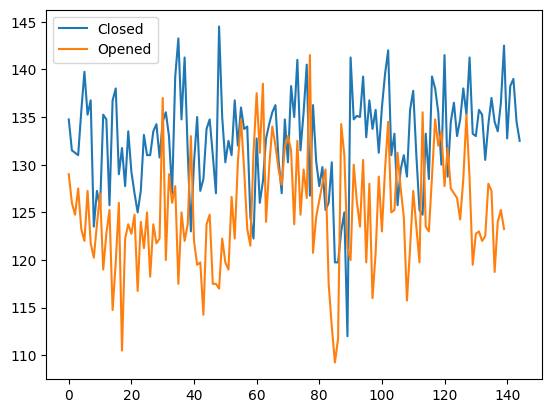

In [128]:
# ld_mean_df_no_idx = ld_mean_df.reset_index(inplace=False)

# plot = ld_mean_df_no_idx.plot()
plot = ld_mean_df.plot()
# plot.set_xlabel('File')
# plot.set_ylabel('Lifetime Distribution Mean')
# #rotate x labels
# plot.set_xticks(range(len(ld_mean_df_no_idx['File'])))
# # plot.set_xticklabels(, rotation=45)
# plot.set_xticklabels(ld_mean_df_no_idx['File'], rotation=90)